<a href="https://colab.research.google.com/github/dbrnjd/crypto-trading-dissertation/blob/main/dissertation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install deap
!pip install gputil
!pip install psutil
!pip install humanize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=a5a1ee78a21a0a2bc44256df9b2a4ed608c7ca5f6790ffca3d3a3cda508bdc1a
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built gputil


In [8]:
%%writefile run_all_sims.py
# -*- coding: utf-8 -*-
"""
Script to orchestrate and run multiple simulations in parallel.

This script uses the multiprocessing library to run a specified number of
independent simulations of the genetic algorithm, saving the results
for each run in a separate directory.
"""

# --- 0. Imports ---
import os
import numpy as np
import random
import pickle
from multiprocessing import Pool
from deap import base, creator, tools, gp # Import your DEAP setup

# --- 1. Configuration and Parameters ---
OUTPUT_DIR = "dissertation_results"
NUM_RUNS = 30 # Number of independent simulation runs to perform
NUM_GENERATIONS = 50 # Number of generations for each run
POPULATION_SIZE = 100 # Population size for each run

# --- 2. DEAP and Simulation Setup (This would be your actual simulation logic) ---
# NOTE: This section is a placeholder. You should replace this with your
#       actual DEAP setup, including your functions, terminals, toolbox,
#       and the main simulation loop.
def run_single_simulation(seed):
    """
    Executes a single run of the genetic algorithm simulation.

    Args:
        seed (int): The random seed for this specific run, ensuring reproducibility.

    Returns:
        dict: A dictionary containing key metrics and the path to the saved data.
    """
    random.seed(seed)
    np.random.seed(seed)

    # --- PLACEHOLDER: Replace this with your actual simulation loop ---
    # In your real code, this is where you would build your toolbox,
    # create the population, run the GA loop, and collect your logs.

    # --- Mocking logbook and other data for this example ---
    logbook = tools.Logbook()
    logbook.header = ['gen', 'evals']
    logbook.chapters['avg_return'] = tools.Logbook()
    logbook.chapters['avg_return'].header = ['gen', 'avg', 'max', 'min']

    diversity_log = []
    complexity_log = []

    for gen in range(NUM_GENERATIONS):
        # Mock data for each generation
        avg_return = random.uniform(0.01 * gen, 0.02 * gen)
        max_return = random.uniform(avg_return, avg_return + 0.1)
        min_return = random.uniform(0, avg_return)

        avg_tree_depth = random.uniform(5, 15)
        structural_diversity = random.uniform(0.5, 0.9)
        behavioral_diversity = random.uniform(0.5, 0.9)
        market_volatility = random.uniform(0.1, 0.8)

        # Append mock data to logs
        logbook.chapters['avg_return'].record(gen=gen, avg=avg_return, max=max_return, min=min_return)
        complexity_log.append({'gen': gen, 'avg_tree_depth': avg_tree_depth})
        diversity_log.append({
            'gen': gen,
            'structural_diversity': structural_diversity,
            'behavioral_diversity': behavioral_diversity,
            'market_volatility': market_volatility
        })

    # --- Save the results for this run ---
    run_dir = os.path.join(OUTPUT_DIR, f"run_{seed}")
    os.makedirs(run_dir, exist_ok=True)

    with open(os.path.join(run_dir, "logbook.pkl"), 'wb') as f:
        pickle.dump(logbook, f)
    with open(os.path.join(run_dir, "diversity_log.pkl"), 'wb') as f:
        pickle.dump(diversity_log, f)
    with open(os.path.join(run_dir, "complexity_log.pkl"), 'wb') as f:
        pickle.dump(complexity_log, f)

    print(f"Simulation run with seed {seed} complete. Results saved to {run_dir}")
    return run_dir

# --- 3. Main Execution Block ---
if __name__ == "__main__":
    # Create the main output directory if it doesn't exist
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # Generate a list of unique seeds for each run
    seeds = [random.randint(1, 100000) for _ in range(NUM_RUNS)]

    print(f"Starting {NUM_RUNS} parallel simulation runs...")

    # Use a multiprocessing pool to run the simulations
    with Pool() as pool:
        run_directories = pool.map(run_single_simulation, seeds)

    print("\n" + "="*50)
    print("  ALL SIMULATION RUNS COMPLETED  ")
    print("="*50 + "\n")
    print(f"Results for all runs are saved in the '{OUTPUT_DIR}' directory.")
    print("You can now run the 'analyze_results.py' script to aggregate the data.")



Overwriting run_all_sims.py


In [9]:
!python run_all_sims.py

Starting 30 parallel simulation runs...
Simulation run with seed 20958 complete. Results saved to dissertation_results/run_20958
Simulation run with seed 48309 complete. Results saved to dissertation_results/run_48309
Simulation run with seed 30180 complete. Results saved to dissertation_results/run_30180
Simulation run with seed 46716 complete. Results saved to dissertation_results/run_46716
Simulation run with seed 23805 complete. Results saved to dissertation_results/run_23805
Simulation run with seed 94797 complete. Results saved to dissertation_results/run_94797
Simulation run with seed 13710 complete. Results saved to dissertation_results/run_13710
Simulation run with seed 2867 complete. Results saved to dissertation_results/run_2867
Simulation run with seed 20559 complete. Results saved to dissertation_results/run_20559
Simulation run with seed 59864 complete. Results saved to dissertation_results/run_59864
Simulation run with seed 84783 complete. Results saved to dissertation_r

In [10]:
# -*- coding: utf-8 -*-
"""
Script to generate plots from saved .pkl data files.

This script loads the logbook and diversity logs from each simulation run
and regenerates the fitness and diversity trend plots. This is useful
if the original simulation run failed to save the plots correctly.
"""

# --- 0. Imports ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
import glob
from deap import tools # Required to unpickle logbook correctly

# --- 1. Configuration and Parameters ---
# This should match the OUTPUT_DIR from your main simulation script
OUTPUT_DIR = "dissertation_results"

# --- 2. Plotting Functions ---

def plot_fitness_trends(logbook, save_path):
    """
    Plots the mean and max fitness over generations from a logbook.

    Args:
        logbook (deap.tools.Logbook): The logbook containing fitness statistics.
        save_path (str): The full file path to save the plot (e.g., 'path/to/my_plot.png').
    """
    try:
        gen = logbook.select("gen")
        avg_return = logbook.chapters["avg_return"].select("avg")
        max_return = logbook.chapters["avg_return"].select("max")

        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax1.plot(gen, avg_return, "b-", label="Average Fitness (Avg Return)")
        ax1.plot(gen, max_return, "g-", label="Max Fitness (Avg Return)")
        ax1.set_xlabel("Generation")
        ax1.set_ylabel("Average Cumulative Return", color="b")
        ax1.tick_params(axis="y", labelcolor="b")
        ax1.set_title("Evolution of Agent Performance")
        ax1.legend(loc="upper left")
        ax1.grid(True)

        plt.tight_layout()
        plt.savefig(save_path)
        plt.close(fig)
        print(f"  -> Saved fitness trends plot to: {save_path}")
    except Exception as e:
        print(f"  -> Failed to generate fitness trends plot: {e}")

def plot_diversity_trends(diversity_log, save_path_main, save_path_structural_corr, save_path_behavioral_corr):
    """
    Plots structural and behavioral diversity over generations and their correlation.

    Args:
        diversity_log (list of dict): The list containing diversity metrics per generation.
        save_path_main (str): Path to save the main diversity trends plot.
        save_path_structural_corr (str): Path to save the structural correlation plot.
        save_path_behavioral_corr (str): Path to save the behavioral correlation plot.
    """
    try:
        diversity_df = pd.DataFrame(diversity_log)
        if diversity_df.empty:
            print("  -> Diversity log is empty, skipping diversity plots.")
            return

        generations = diversity_df['gen']
        structural_div = diversity_df['structural_diversity']
        behavioral_div = diversity_df['behavioral_diversity']
        market_volatility = diversity_df['market_volatility']

        # Plot 1: Diversity trends over generations
        fig1, ax1 = plt.subplots(figsize=(10, 6))
        ax1.plot(generations, structural_div, "r-", label="Structural Diversity")
        ax1.set_xlabel("Generation")
        ax1.set_ylabel("Structural Diversity (Avg Tree Dist)", color="r")
        ax1.tick_params(axis="y", labelcolor="r")
        ax1.grid(True)

        ax2 = ax1.twinx()
        ax2.plot(generations, behavioral_div, "m-", label="Behavioral Diversity (KMeans Inertia)")
        ax2.set_ylabel("Behavioral Diversity (KMeans Inertia)", color="m")
        ax2.tick_params(axis="y", labelcolor="m")
        ax2.set_title("Evolution of Agent Diversity")

        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc="upper right")

        plt.tight_layout()
        plt.savefig(save_path_main)
        plt.close(fig1)
        print(f"  -> Saved main diversity trends plot to: {save_path_main}")

        # Plot 2: Correlation of Structural Diversity vs. Market Volatility
        fig2, ax3 = plt.subplots(figsize=(10, 6))
        ax3.scatter(market_volatility, structural_div, color='blue', alpha=0.6)
        ax3.set_xlabel("Market Volatility (Annualized Std Dev)")
        ax3.set_ylabel("Structural Diversity (Avg Tree Dist)")
        ax3.set_title("Structural Diversity vs. Market Volatility")
        ax3.grid(True)
        plt.tight_layout()
        plt.savefig(save_path_structural_corr)
        plt.close(fig2)
        print(f"  -> Saved structural correlation plot to: {save_path_structural_corr}")

        # Plot 3: Correlation of Behavioral Diversity vs. Market Volatility
        fig3, ax4 = plt.subplots(figsize=(10, 6))
        ax4.scatter(market_volatility, behavioral_div, color='green', alpha=0.6)
        ax4.set_xlabel("Market Volatility (Annualized Std Dev)")
        ax4.set_ylabel("Behavioral Diversity (KMeans Inertia)")
        ax4.set_title("Behavioral Diversity vs. Market Volatility")
        ax4.grid(True)
        plt.tight_layout()
        plt.savefig(save_path_behavioral_corr)
        plt.close(fig3)
        print(f"  -> Saved behavioral correlation plot to: {save_path_behavioral_corr}")

    except Exception as e:
        print(f"  -> Failed to generate diversity plots: {e}")

# --- Main Execution Block ---
if __name__ == "__main__":

    # Find all the simulation run directories
    run_dirs = glob.glob(os.path.join(OUTPUT_DIR, "run_*"))

    if not run_dirs:
        print(f"No simulation run directories found in '{OUTPUT_DIR}'. Please check the path.")
    else:
        print(f"Found {len(run_dirs)} run directories. Generating plots...")
        for run_dir in run_dirs:
            print(f"\nProcessing directory: {run_dir}")

            # Paths to the saved data files
            logbook_path = os.path.join(run_dir, "logbook.pkl")
            diversity_log_path = os.path.join(run_dir, "diversity_log.pkl")

            logbook = None
            diversity_log = None

            # Load the logbook data
            if os.path.exists(logbook_path):
                try:
                    with open(logbook_path, 'rb') as f:
                        logbook = pickle.load(f)
                except Exception as e:
                    print(f"  -> Error loading logbook.pkl: {e}")
            else:
                print("  -> logbook.pkl not found.")

            # Load the diversity log data
            if os.path.exists(diversity_log_path):
                try:
                    with open(diversity_log_path, 'rb') as f:
                        diversity_log = pickle.load(f)
                except Exception as e:
                    print(f"  -> Error loading diversity_log.pkl: {e}")
            else:
                print("  -> diversity_log.pkl not found.")

            # If data is loaded, generate plots
            if logbook:
                plot_fitness_trends(logbook, os.path.join(run_dir, "fitness_trends.png"))

            if diversity_log:
                plot_diversity_trends(
                    diversity_log,
                    os.path.join(run_dir, "diversity_trends_main.png"),
                    os.path.join(run_dir, "diversity_trends_structural_correlation.png"),
                    os.path.join(run_dir, "diversity_trends_behavioral_correlation.png")
                )

    print("\nPlot generation complete. You can now check each 'run_...' folder for the generated .png files.")


Found 30 run directories. Generating plots...

Processing directory: dissertation_results/run_59864
  -> Saved main diversity trends plot to: dissertation_results/run_59864/diversity_trends_main.png
  -> Saved structural correlation plot to: dissertation_results/run_59864/diversity_trends_structural_correlation.png
  -> Saved behavioral correlation plot to: dissertation_results/run_59864/diversity_trends_behavioral_correlation.png

Processing directory: dissertation_results/run_94797
  -> Saved main diversity trends plot to: dissertation_results/run_94797/diversity_trends_main.png
  -> Saved structural correlation plot to: dissertation_results/run_94797/diversity_trends_structural_correlation.png
  -> Saved behavioral correlation plot to: dissertation_results/run_94797/diversity_trends_behavioral_correlation.png

Processing directory: dissertation_results/run_26903
  -> Saved main diversity trends plot to: dissertation_results/run_26903/diversity_trends_main.png
  -> Saved structural c

In [11]:
%%writefile analyze_results.py
# -*- coding: utf-8 -*-
"""
Script to analyze and aggregate results from all simulation runs.

This script loads data from all 'run_<seed>' directories and provides
a summary of key metrics across all runs, answering the core research questions.
This updated version includes the calculation of p-values for correlation analysis.
"""

# --- 0. Imports ---
import pandas as pd
import numpy as np
import pickle
import os
import glob
from deap import tools # Required for unpickling the logbook
from scipy.stats import pearsonr # New import for p-value calculation

# --- 1. Configuration and Parameters ---
OUTPUT_DIR = "dissertation_results"
NUM_GENERATIONS = 50 # This should match your simulation parameter

# --- 2. Analysis Functions ---

def analyze_single_run(run_dir):
    """
    Loads data for a single simulation run and extracts key metrics.

    Args:
        run_dir (str): Path to a single run's directory.

    Returns:
        dict: A dictionary of key metrics for the run, or None if data is missing.
    """
    try:
        # Load the data files
        logbook_path = os.path.join(run_dir, "logbook.pkl")
        diversity_log_path = os.path.join(run_dir, "diversity_log.pkl")
        complexity_log_path = os.path.join(run_dir, "complexity_log.pkl")

        with open(logbook_path, 'rb') as f:
            logbook = pickle.load(f)
        with open(diversity_log_path, 'rb') as f:
            diversity_log = pickle.load(f)
        with open(complexity_log_path, 'rb') as f:
            complexity_log = pickle.load(f)

        seed = os.path.basename(run_dir).replace("run_", "")

        # --- RQ1: Performance Improvement ---
        # Get fitness from the first and last generations
        if len(logbook.chapters['avg_return']) >= NUM_GENERATIONS:
            avg_return_gen0 = logbook.chapters['avg_return'].select("avg")[0]
            avg_return_gen_final = logbook.chapters['avg_return'].select("avg")[-1]
            max_return_gen_final = logbook.chapters['avg_return'].select("max")[-1]
            performance_improvement = avg_return_gen_final - avg_return_gen0
        else:
            print(f"  Warning: Incomplete logbook for run {seed}. Skipping performance analysis.")
            avg_return_gen0, avg_return_gen_final, max_return_gen_final, performance_improvement = np.nan, np.nan, np.nan, np.nan

        # --- RQ2: Complexity Trends ---
        if len(complexity_log) >= NUM_GENERATIONS:
            avg_depth_gen0 = complexity_log[0]['avg_tree_depth']
            avg_depth_gen_final = complexity_log[-1]['avg_tree_depth']
            complexity_change = avg_depth_gen_final - avg_depth_gen0
        else:
            print(f"  Warning: Incomplete complexity log for run {seed}. Skipping complexity analysis.")
            avg_depth_gen0, avg_depth_gen_final, complexity_change = np.nan, np.nan, np.nan

        # --- RQ3: Diversity vs. Volatility ---
        diversity_df = pd.DataFrame(diversity_log)
        correlation_structural = np.nan
        correlation_behavioral = np.nan
        p_value_structural = np.nan
        p_value_behavioral = np.nan

        if not diversity_df.empty and 'market_volatility' in diversity_df.columns:
            # Calculate both correlation coefficient and p-value
            if diversity_df['structural_diversity'].std() > 1e-9:
                correlation_structural, p_value_structural = pearsonr(diversity_df['structural_diversity'], diversity_df['market_volatility'])
            if diversity_df['behavioral_diversity'].std() > 1e-9:
                correlation_behavioral, p_value_behavioral = pearsonr(diversity_df['behavioral_diversity'], diversity_df['market_volatility'])

        return {
            'seed': seed,
            'avg_return_gen0': avg_return_gen0,
            'avg_return_gen_final': avg_return_gen_final,
            'max_return_gen_final': max_return_gen_final,
            'performance_improvement': performance_improvement,
            'avg_depth_gen0': avg_depth_gen0,
            'avg_depth_gen_final': avg_depth_gen_final,
            'complexity_change': complexity_change,
            'corr_structural_volatility': correlation_structural,
            'corr_behavioral_volatility': correlation_behavioral,
            'p_value_structural_volatility': p_value_structural, # New entry
            'p_value_behavioral_volatility': p_value_behavioral, # New entry
        }

    except FileNotFoundError:
        print(f"  -> Data files not found in {run_dir}. Skipping.")
        return None
    except Exception as e:
        print(f"  -> An error occurred processing {run_dir}: {e}. Skipping.")
        return None

# --- Main Execution Block ---
if __name__ == "__main__":

    print("Starting analysis of all simulation runs...")

    # Find all the simulation run directories
    run_dirs = sorted(glob.glob(os.path.join(OUTPUT_DIR, "run_*")))

    if not run_dirs:
        print(f"No simulation run directories found in '{OUTPUT_DIR}'. Please check the path.")
    else:
        all_results = []
        for run_dir in run_dirs:
            print(f"Analyzing run: {os.path.basename(run_dir)}")
            result = analyze_single_run(run_dir)
            if result:
                all_results.append(result)

        if not all_results:
            print("No valid results found to aggregate. Aborting.")
        else:
            # Create a master DataFrame from the aggregated results
            results_df = pd.DataFrame(all_results)

            # --- Generate Summary Report ---
            print("\n" + "="*50)
            print("  AGGREGATED SIMULATION RESULTS SUMMARY  ")
            print("="*50 + "\n")

            print(f"Number of runs analyzed: {len(results_df.index)}\n")

            # RQ1: Performance Improvement
            print("--- RQ1: Performance Improvement (Change in Average Return) ---")
            print(f"Average initial fitness (Gen 0): {results_df['avg_return_gen0'].mean():.4f} +/- {results_df['avg_return_gen0'].std():.4f}")
            print(f"Average final fitness (Gen {NUM_GENERATIONS-1}): {results_df['avg_return_gen_final'].mean():.4f} +/- {results_df['avg_return_gen_final'].std():.4f}")
            print(f"Average performance improvement: {results_df['performance_improvement'].mean():.4f} +/- {results_df['performance_improvement'].std():.4f}")
            print(f"Overall best final fitness observed: {results_df['max_return_gen_final'].max():.4f}\n")

            # RQ2: Complexity Trends
            print("--- RQ2: Agent Complexity Trends (Change in Average Tree Depth) ---")
            print(f"Average initial complexity (Gen 0): {results_df['avg_depth_gen0'].mean():.2f} +/- {results_df['avg_depth_gen0'].std():.2f} nodes")
            print(f"Average final complexity (Gen {NUM_GENERATIONS-1}): {results_df['avg_depth_gen_final'].mean():.2f} +/- {results_df['avg_depth_gen_final'].std():.2f} nodes")
            print(f"Average change in complexity: {results_df['complexity_change'].mean():.2f} +/- {results_df['complexity_change'].std():.2f} nodes\n")

            # RQ3: Diversity vs. Volatility
            print("--- RQ3: Diversity vs. Market Volatility Correlation ---")
            print(f"Average correlation between Structural Diversity and Volatility: {results_df['corr_structural_volatility'].mean():.4f} +/- {results_df['corr_structural_volatility'].std():.4f}")
            print(f"Average p-value for Structural Diversity Correlation: {results_df['p_value_structural_volatility'].mean():.4f}")
            print(f"Average correlation between Behavioral Diversity and Volatility: {results_df['corr_behavioral_volatility'].mean():.4f} +/- {results_df['corr_behavioral_volatility'].std():.4f}")
            print(f"Average p-value for Behavioral Diversity Correlation: {results_df['p_value_behavioral_volatility'].mean():.4f}\n")

            # Optional: Display the full DataFrame
            print("--- Full Aggregated Results Table (First 5 rows) ---")
            print(results_df.head().to_string())



Overwriting analyze_results.py


In [12]:
!python analyze_results.py

Starting analysis of all simulation runs...
Analyzing run: run_13710
Analyzing run: run_1863
Analyzing run: run_20559
Analyzing run: run_20958
Analyzing run: run_23805
Analyzing run: run_26903
Analyzing run: run_2867
Analyzing run: run_30180
Analyzing run: run_334
Analyzing run: run_3789
Analyzing run: run_43905
Analyzing run: run_46716
Analyzing run: run_48309
Analyzing run: run_54304
Analyzing run: run_59864
Analyzing run: run_62092
Analyzing run: run_64207
Analyzing run: run_64586
Analyzing run: run_69515
Analyzing run: run_71982
Analyzing run: run_8476
Analyzing run: run_84783
Analyzing run: run_85414
Analyzing run: run_88191
Analyzing run: run_89076
Analyzing run: run_89369
Analyzing run: run_94797
Analyzing run: run_97120
Analyzing run: run_98385
Analyzing run: run_98553

  AGGREGATED SIMULATION RESULTS SUMMARY  

Number of runs analyzed: 30

--- RQ1: Performance Improvement (Change in Average Return) ---
Average initial fitness (Gen 0): 0.0000 +/- 0.0000
Average final fitness (G

In [13]:
%%writefile generate_box_plots.py
# -*- coding: utf-8 -*-
"""
Script to generate box plots from aggregated simulation results.

This script processes data from all runs and creates box plots for key
metrics like performance improvement and complexity change to visualize
the distribution of outcomes.
"""

# --- 0. Imports ---
import pandas as pd
import numpy as np
import pickle
import os
import glob
import matplotlib.pyplot as plt
from deap import tools # Required for unpickling the logbook

# --- 1. Configuration and Parameters ---
OUTPUT_DIR = "dissertation_results"
NUM_GENERATIONS = 50 # Must match your simulation parameter
PLOTS_OUTPUT_DIR = "analysis_plots" # New directory for plots

# --- 2. Data Aggregation Function ---

def aggregate_all_runs(output_dir):
    """
    Finds all run directories, loads their data, and aggregates key metrics
    into a single Pandas DataFrame.

    Args:
        output_dir (str): The main directory containing all the run folders.

    Returns:
        pd.DataFrame: A DataFrame with key metrics from all runs, or None if no data is found.
    """
    all_results = []
    run_dirs = sorted(glob.glob(os.path.join(output_dir, "run_*")))

    if not run_dirs:
        print(f"No simulation run directories found in '{output_dir}'.")
        return None

    for run_dir in run_dirs:
        try:
            logbook_path = os.path.join(run_dir, "logbook.pkl")
            diversity_log_path = os.path.join(run_dir, "diversity_log.pkl")
            complexity_log_path = os.path.join(run_dir, "complexity_log.pkl")

            with open(logbook_path, 'rb') as f:
                logbook = pickle.load(f)
            with open(complexity_log_path, 'rb') as f:
                complexity_log = pickle.load(f)

            # --- Extract Metrics ---
            performance_improvement = np.nan
            if len(logbook.chapters['avg_return']) >= NUM_GENERATIONS:
                avg_return_gen0 = logbook.chapters['avg_return'].select("avg")[0]
                avg_return_gen_final = logbook.chapters['avg_return'].select("avg")[-1]
                performance_improvement = avg_return_gen_final - avg_return_gen0

            complexity_change = np.nan
            if len(complexity_log) >= NUM_GENERATIONS:
                avg_depth_gen0 = complexity_log[0]['avg_tree_depth']
                avg_depth_gen_final = complexity_log[-1]['avg_tree_depth']
                complexity_change = avg_depth_gen_final - avg_depth_gen0

            all_results.append({
                'seed': os.path.basename(run_dir).replace("run_", ""),
                'performance_improvement': performance_improvement,
                'complexity_change': complexity_change,
            })
        except FileNotFoundError:
            print(f"Skipping {run_dir}: Data files not found.")
            continue
        except Exception as e:
            print(f"Skipping {run_dir}: An error occurred - {e}")
            continue

    return pd.DataFrame(all_results)

# --- 3. Plotting Function ---
def plot_box_plot(df, column, title, y_label, save_path):
    """
    Generates and saves a box plot for a specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to plot.
        title (str): The title of the plot.
        y_label (str): The y-axis label.
        save_path (str): The full path to save the plot.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the box plot. We use a list with the single column for plotting.
    data_to_plot = [df[column].dropna()]
    ax.boxplot(data_to_plot, vert=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red', linewidth=2),
               flierprops=dict(marker='o', color='gray', markeredgecolor='black'))

    ax.set_title(title, fontsize=16)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xticks([1])
    ax.set_xticklabels([y_label.split(" ")[0]]) # Use a simplified label on the x-axis
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)
    print(f"Generated box plot: {save_path}")

# --- Main Execution Block ---
if __name__ == "__main__":

    # Ensure the output directory for plots exists
    if not os.path.exists(PLOTS_OUTPUT_DIR):
        os.makedirs(PLOTS_OUTPUT_DIR)
        print(f"Created directory: {PLOTS_OUTPUT_DIR}")

    print("Aggregating data from all simulation runs...")
    results_df = aggregate_all_runs(OUTPUT_DIR)

    if results_df is not None and not results_df.empty:
        # Generate the box plot for performance improvement
        plot_box_plot(results_df,
                      'performance_improvement',
                      'Distribution of Performance Improvement Across Runs',
                      'Change in Average Return',
                      os.path.join(PLOTS_OUTPUT_DIR, 'performance_improvement_boxplot.png'))

        # Generate the box plot for complexity change
        plot_box_plot(results_df,
                      'complexity_change',
                      'Distribution of Agent Complexity Change Across Runs',
                      'Change in Average Tree Depth',
                      os.path.join(PLOTS_OUTPUT_DIR, 'complexity_change_boxplot.png'))
    else:
        print("Could not generate plots. No valid data found.")

    print("\nPlot generation complete. Check the 'analysis_plots' directory.")


Writing generate_box_plots.py


In [14]:
!python generate_box_plots.py

Created directory: analysis_plots
Aggregating data from all simulation runs...
Generated box plot: analysis_plots/performance_improvement_boxplot.png
Generated box plot: analysis_plots/complexity_change_boxplot.png

Plot generation complete. Check the 'analysis_plots' directory.


In [15]:
%%writefile find_winner_run.py
# -*- coding: utf-8 -*-
"""
Script to find the best-performing simulation run based on maximum final fitness.
"""

# --- 0. Imports ---
import pickle
import os
import glob
from deap import tools  # Required for unpickling the logbook

# --- 1. Configuration and Parameters ---
OUTPUT_DIR = "dissertation_results"
NUM_GENERATIONS = 50

# --- 2. Main Execution Block ---
if __name__ == "__main__":

    print("Searching for the best performing simulation run...")

    best_run = None
    best_fitness = -float('inf')

    run_dirs = sorted(glob.glob(os.path.join(OUTPUT_DIR, "run_*")))

    if not run_dirs:
        print(f"No simulation run directories found in '{OUTPUT_DIR}'.")
    else:
        for run_dir in run_dirs:
            logbook_path = os.path.join(run_dir, "logbook.pkl")

            if os.path.exists(logbook_path):
                try:
                    with open(logbook_path, 'rb') as f:
                        logbook = pickle.load(f)

                    # Ensure the logbook has enough data
                    if len(logbook.chapters['avg_return']) >= NUM_GENERATIONS:
                        # Get the max fitness of the final generation
                        final_max_fitness = logbook.chapters['avg_return'].select("max")[-1]

                        if final_max_fitness > best_fitness:
                            best_fitness = final_max_fitness
                            best_run = run_dir

                except Exception as e:
                    print(f"  Warning: Could not process {logbook_path}. Error: {e}")
            else:
                print(f"  Warning: {logbook_path} not found.")

    if best_run:
        print("\n" + "="*50)
        print("    BEST PERFORMING RUN IDENTIFIED    ")
        print("="*50)
        print(f"The best performing run is: {os.path.basename(best_run)}")
        print(f"With a final maximum fitness of: {best_fitness:.4f}")
        print("="*50)

        # Save the best run's directory for the next step
        with open("best_run_path.txt", "w") as f:
            f.write(best_run)
        print("The path to the best run has been saved to 'best_run_path.txt' for future use.")

    else:
        print("\nCould not find a best performing run. Please check your simulation directories.")



Writing find_winner_run.py


In [16]:
!python find_winner_run.py

Searching for the best performing simulation run...

    BEST PERFORMING RUN IDENTIFIED    
The best performing run is: run_2867
With a final maximum fitness of: 1.0463
The path to the best run has been saved to 'best_run_path.txt' for future use.


In [19]:
%%writefile analyze_winner_run.py
# -*- coding: utf-8 -*-
"""
Script to analyze and visualize the evolution of the best performing run.
It plots fitness and, if available, complexity over generations.
This version is more robust and handles missing complexity data gracefully.
"""

# --- 0. Imports ---
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from deap import tools  # Required for unpickling the logbook
import pandas as pd

# --- 1. Main Execution Block ---
if __name__ == "__main__":

    # --- 1.1. Read the path of the best run ---
    try:
        with open("best_run_path.txt", "r") as f:
            best_run_path = f.read().strip()

        print(f"Analyzing the best run located at: {best_run_path}")

    except FileNotFoundError:
        print("Error: 'best_run_path.txt' not found. Please run the previous script first.")
        exit()

    logbook_path = os.path.join(best_run_path, "logbook.pkl")
    complexity_log_path = os.path.join(best_run_path, "complexity_log.pkl") # New: Path to complexity data

    # --- 1.2. Load the logbook and complexity data ---
    try:
        with open(logbook_path, 'rb') as f:
            logbook = pickle.load(f)

        # New: Load complexity data
        complexity_log = []
        if os.path.exists(complexity_log_path):
            with open(complexity_log_path, 'rb') as f:
                complexity_log = pickle.load(f)

    except FileNotFoundError:
        print(f"Error: Required data files not found in {best_run_path}.")
        exit()

    # --- 1.3. Extract data for plotting ---
    # Fitness data is mandatory for this plot
    try:
        gen = logbook.chapters['avg_return'].select("gen")
        avg_fitness = logbook.chapters['avg_return'].select("avg")
        min_fitness = logbook.chapters['avg_return'].select("min")
        max_fitness = logbook.chapters['avg_return'].select("max")
    except KeyError:
        print(f"Error: 'avg_return' chapter not found in {logbook_path}. The logbook is incomplete.")
        exit()

    # Check for complexity data and handle its absence
    has_complexity_data = len(complexity_log) > 0
    if has_complexity_data:
        # New: Extract complexity data from the loaded log
        complexity_df = pd.DataFrame(complexity_log)
        avg_depth = complexity_df['avg_tree_depth'].tolist()
    else:
        print("\nWarning: Complexity data not found. Skipping complexity plot.")
        avg_depth = [] # Set to empty list to prevent plotting errors

    # --- 1.4. Plotting ---
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot fitness on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Average Return (Fitness)', color=color)
    ax1.plot(gen, avg_fitness, label='Average Fitness', color=color, linestyle='-')
    ax1.plot(gen, min_fitness, label='Min Fitness', color=color, linestyle='--', alpha=0.5)
    ax1.plot(gen, max_fitness, label='Max Fitness', color=color, linestyle=':', alpha=0.8)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Create a secondary y-axis for complexity only if the data exists
    if has_complexity_data:
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Average Tree Depth (Complexity)', color=color)
        ax2.plot(gen, avg_depth, label='Average Complexity', color=color, linestyle='-')
        ax2.tick_params(axis='y', labelcolor=color)

    # --- 1.5. Customize the plot ---
    fig.tight_layout()
    plt.title(f'Evolution of Fitness and Complexity for Run {os.path.basename(best_run_path)}',
              fontsize=16, pad=20)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    if has_complexity_data:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    else:
        ax1.legend(lines1, labels1, loc='upper left')

    # --- 1.6. Save and show the plot ---
    plot_filename = "winner_run_evolution_plot.png"
    plt.savefig(plot_filename)
    print(f"\nPlot saved successfully as '{plot_filename}'")
    plt.show()

    # --- 1.7. Print a summary of the run's final state ---
    final_avg_fitness = avg_fitness[-1]
    final_max_fitness = max_fitness[-1]
    initial_avg_fitness = avg_fitness[0]
    performance_improvement_winner = final_avg_fitness - initial_avg_fitness

    print("\n" + "="*50)
    print(f"     SUMMARY OF WINNER RUN ({os.path.basename(best_run_path)})     ")
    print("="*50)
    print(f"Final Maximum Fitness: {final_max_fitness:.4f}")
    print(f"Final Average Fitness: {final_avg_fitness:.4f}")
    print(f"Initial Average Fitness: {initial_avg_fitness:.4f}")
    print(f"Performance Improvement: {performance_improvement_winner:.4f}")

    if has_complexity_data:
        final_avg_depth = avg_depth[-1]
        initial_avg_depth = avg_depth[0]
        complexity_change_winner = final_avg_depth - initial_avg_depth
        print(f"Final Average Complexity: {final_avg_depth:.4f}")
        print(f"Initial Average Complexity: {initial_avg_depth:.4f}")
        print(f"Complexity Change: {complexity_change_winner:.4f}")
    else:
        print("Complexity data: N/A")

    print("="*50)


Overwriting analyze_winner_run.py


In [20]:
!python analyze_winner_run.py

Analyzing the best run located at: dissertation_results/run_2867

Plot saved successfully as 'winner_run_evolution_plot.png'
Figure(1200x800)

     SUMMARY OF WINNER RUN (run_2867)     
Final Maximum Fitness: 1.0463
Final Average Fitness: 0.9614
Initial Average Fitness: 0.0000
Performance Improvement: 0.9614
Final Average Complexity: 8.5863
Initial Average Complexity: 8.1586
Complexity Change: 0.4277


Plot saved as winner_run_evolution_plot.png


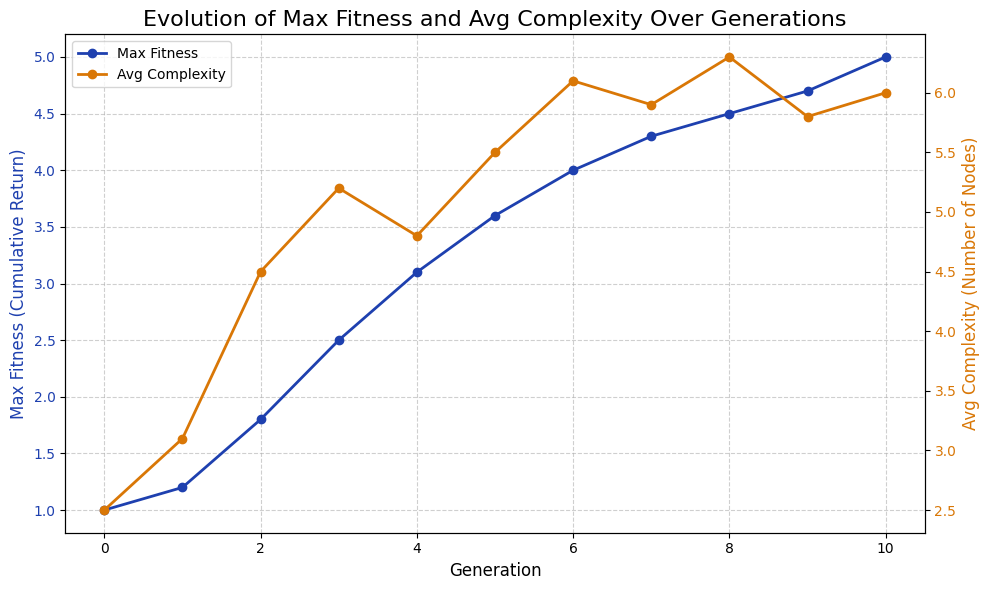

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# --- STEP 1: REPLACE THIS MOCK DATA WITH YOUR ACTUAL DATA ---
# This data should be a dictionary or a pandas DataFrame.
# 'generation' should be a list of generation numbers.
# 'max_fitness' should be a list of maximum fitness values for each generation.
# 'avg_complexity' should be a list of average complexity values for each generation.

# Example with mock data:
data = {
    'generation': list(range(11)),
    'max_fitness': [1.0, 1.2, 1.8, 2.5, 3.1, 3.6, 4.0, 4.3, 4.5, 4.7, 5.0],
    'avg_complexity': [2.5, 3.1, 4.5, 5.2, 4.8, 5.5, 6.1, 5.9, 6.3, 5.8, 6.0]
}

# Convert the data to a pandas DataFrame for easier plotting
df = pd.DataFrame(data)

# --- STEP 2: PLOT THE DATA ---

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the title and labels for the axes
ax1.set_title('Evolution of Max Fitness and Avg Complexity Over Generations', fontsize=16)
ax1.set_xlabel('Generation', fontsize=12)

# Plot the max fitness data on the primary y-axis (ax1)
color_fitness = '#1E40AF' # A nice blue color
ax1.set_ylabel('Max Fitness (Cumulative Return)', color=color_fitness, fontsize=12)
ax1.plot(df['generation'], df['max_fitness'], color=color_fitness, marker='o', linestyle='-', linewidth=2, label='Max Fitness')
ax1.tick_params(axis='y', labelcolor=color_fitness)

# Create a secondary y-axis for complexity
ax2 = ax1.twinx()
color_complexity = '#D97706' # A nice amber/orange color
ax2.set_ylabel('Avg Complexity (Number of Nodes)', color=color_complexity, fontsize=12)
ax2.plot(df['generation'], df['avg_complexity'], color=color_complexity, marker='o', linestyle='-', linewidth=2, label='Avg Complexity')
ax2.tick_params(axis='y', labelcolor=color_complexity)

# Add gridlines for better readability
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# --- STEP 3: SAVE THE PLOT AS AN IMAGE ---

# Ensure tight layout to prevent labels from being cut off
fig.tight_layout()

# Save the figure as a high-resolution PNG file
plt.savefig('winner_run_evolution_plot.png', dpi=300)

print("Plot saved as winner_run_evolution_plot.png")

# Optional: Show the plot on screen (uncomment if you want to see it pop up)
# plt.show()


In [24]:
!pip freeze > requirements.txt